In [7]:
# Load libraries
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
# Set random seed
np.random.seed(0)

### LOAD USPS Digit ONE along with random uniform NOISE

importing usps from pickle file .....
Data Shape (440, 256)


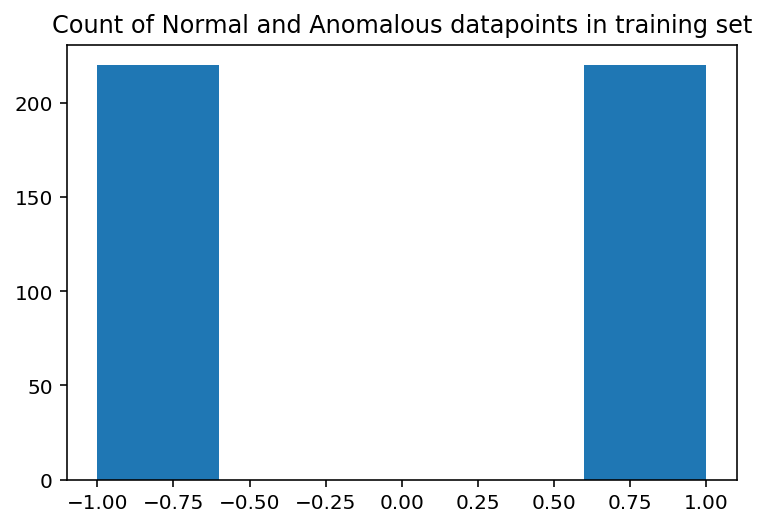

(294, 256) (294,)
(146, 256) (146,)


In [19]:
%config InlineBackend.figure_format = 'retina'
# let's take a look at the types of labels  are present in the data.
# The ones correspond to label 1 and 7's(outliers) correspond to label -1
#data.label.value_counts().plot(kind='bar')
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import utils
import matplotlib
from sklearn.model_selection import train_test_split

dataPath = './'

def prepare_usps_mlfetch():

    import tempfile
    import pickle
    print "importing usps from pickle file ....."

    with open(dataPath+'usps_data.pkl', "rb") as fp:
          loaded_data1 = pickle.load(fp)

    # test_data_home = tempfile.mkdtemp()
    # from sklearn.datasets.mldata import fetch_mldata
    # usps = fetch_mldata('usps', data_home=test_data_home)
    # print usps.target.shape
    # print type(usps.target)
    labels = loaded_data1['target']
    data = loaded_data1['data']
    # print "******",labels

    k_ones = np.where(labels == 2)
    label_ones = labels[k_ones]
    data_ones = data[k_ones]

    k_sevens = np.where(labels == 8)
    label_sevens = labels[k_sevens]
    data_sevens = data[k_sevens]
    #
    # print "data_sevens:",data_sevens.shape
    # print "label_sevens:",label_sevens.shape
    # print "data_ones:",data_ones.shape
    # print "label_ones:",label_ones.shape
    #
    data_ones = data_ones[:220]
    label_ones= label_ones[:220]
    
    data_sevens =  np.random.uniform(0,1,(len(data_ones),256))
    label_ones  =  1*np.ones(len(data_ones))
    label_sevens = -1*np.ones(len(data_sevens))

    data = np.concatenate((data_ones,data_sevens),axis=0)
    label = np.concatenate((label_ones,label_sevens),axis=0)
    
    #label[0:220] = 1
    #label[220:231] = -1
    # print "1-s",data[0]
    # print label
    # print "7-s",data[230]
    # print label
    # print "data:",data.shape
    # print "label:",label.shape
    return [data,label]


[Xtrue,Xlabels] = prepare_usps_mlfetch()
data = Xtrue
print "Data Shape",Xtrue.shape
import matplotlib.pyplot as plt
plt.hist(Xlabels,bins=5)
plt.title("Count of Normal and Anomalous datapoints in training set")
plt.show()
## Split train and test case split 
X = Xtrue
y = Xlabels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print X_train.shape,y_train.shape
print X_test.shape,y_test.shape

In [27]:
number_of_features = 256
# Start neural network
model = models.Sequential()

# Add fully connected layer with a ReLU activation function
model.add(layers.Dense(units=256, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
model.add(layers.Dense(units=128, activation='relu'))

# Add fully connected layer with a sigmoid activation function
model.add(layers.Dense(units=1, activation='sigmoid'))

# Compile neural network
model.compile(loss='binary_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

print model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 98,817
Trainable params: 98,817
Non-trainable params: 0
_________________________________________________________________
None


### Train the Neural Network 

In [30]:
# Train neural network
history = model.fit(X_train, # Features
                      y_train, # Target vector
                      epochs=100, # Number of epochs
                      verbose=1, # Print description after each epoch
                      batch_size=10, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data for evaluation

Train on 294 samples, validate on 146 samples
Epoch 1/100
294/294 [==============================] - 0s 482us/step - loss: -8.2231 - acc: 0.4898 - val_loss: -7.7278 - val_acc: 0.5205
Epoch 2/100
294/294 [==============================] - 0s 452us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7278 - val_acc: 0.5205
Epoch 3/100
294/294 [==============================] - 0s 412us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 4/100
294/294 [==============================] - 0s 411us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 5/100
294/294 [==============================] - 0s 416us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 6/100
294/294 [==============================] - 0s 416us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 7/100
294/294 [==============================] - 0s 425us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.

294/294 [==============================] - 0s 497us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 61/100
294/294 [==============================] - 0s 465us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 62/100
294/294 [==============================] - 0s 477us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 63/100
294/294 [==============================] - 0s 497us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 64/100
294/294 [==============================] - 0s 527us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 65/100
294/294 [==============================] - 0s 472us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 66/100
294/294 [==============================] - 0s 439us/step - loss: -8.2235 - acc: 0.4898 - val_loss: -7.7279 - val_acc: 0.5205
Epoch 67/100
294/294 [=========================

## Load USPS Data

importing usps from pickle file .....
Data Shape (231, 256)


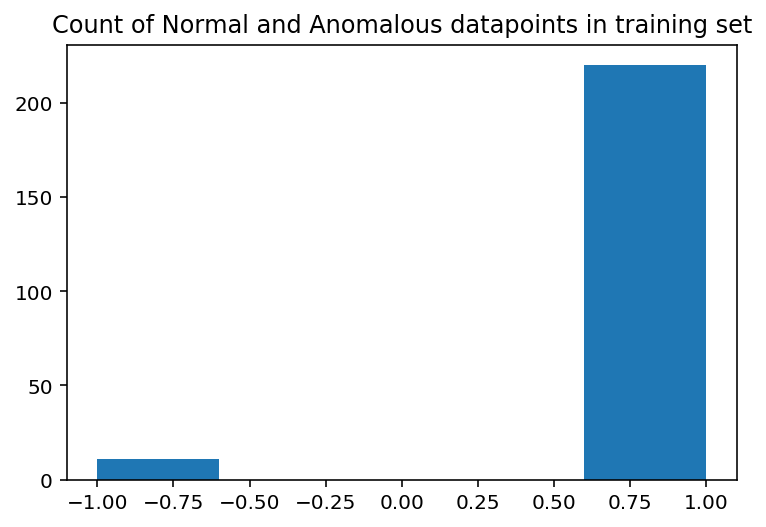

In [13]:
%config InlineBackend.figure_format = 'retina'
# let's take a look at the types of labels  are present in the data.
# The ones correspond to label 1 and 7's(outliers) correspond to label -1
#data.label.value_counts().plot(kind='bar')
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import utils
import matplotlib

dataPath = './'
def prepare_usps_mlfetch():

    import tempfile
    import pickle
    print "importing usps from pickle file ....."

    with open(dataPath+'usps_data.pkl', "rb") as fp:
          loaded_data1 = pickle.load(fp)

    # test_data_home = tempfile.mkdtemp()
    # from sklearn.datasets.mldata import fetch_mldata
    # usps = fetch_mldata('usps', data_home=test_data_home)
    # print usps.target.shape
    # print type(usps.target)
    labels = loaded_data1['target']
    data = loaded_data1['data']
    # print "******",labels

    k_ones = np.where(labels == 2)
    label_ones = labels[k_ones]
    data_ones = data[k_ones]

    k_sevens = np.where(labels == 8)
    label_sevens = labels[k_sevens]
    data_sevens = data[k_sevens]
    #
    # print "data_sevens:",data_sevens.shape
    # print "label_sevens:",label_sevens.shape
    # print "data_ones:",data_ones.shape
    # print "label_ones:",label_ones.shape
    #
    data_ones = data_ones[:220]
    label_ones= label_ones[:220]
    data_sevens = data_sevens[:11]
    label_sevens = label_sevens[:11]

    data = np.concatenate((data_ones,data_sevens),axis=0)
    label = np.concatenate((label_ones,label_sevens),axis=0)
    label[0:220] = 1
    label[220:231] = -1
    # print "1-s",data[0]
    # print label
    # print "7-s",data[230]
    # print label
    # print "data:",data.shape
    # print "label:",label.shape
    return [data,label]


[Xtrue,Xlabels] = prepare_usps_mlfetch()
data = Xtrue
print "Data Shape",Xtrue.shape
import matplotlib.pyplot as plt
plt.hist(Xlabels,bins=5)
plt.title("Count of Normal and Anomalous datapoints in training set")
plt.show()